In [61]:
import regex as re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [48]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [49]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [50]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [51]:
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'Cool.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    parsedData = []
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [52]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
1935,2021-01-07,11:58 AM,Fawaz,Power outage... Inverter did not kicked in.......
1936,2021-01-07,12:20 PM,Prabakaran,Ok
1937,2021-01-07,1:11 PM,Fawaz,Power is back logging in
1938,2021-01-08,12:06 PM,Shrilay,Pulse secure down for me and Fawaz
1939,2021-01-08,12:06 PM,Shrilay,Is it working for anyone else ?
1940,2021-01-08,12:07 PM,Uday,Vdi disconnected for me
1941,2021-01-08,12:07 PM,Shrilay,So no one is monitoring?
1942,2021-01-08,12:08 PM,Padma,VDI got disconnected for me
1943,2021-01-08,12:09 PM,Shrilay,Check if pulse secure is connected
1944,2021-01-08,12:09 PM,Shrilay,Task bar. Bottom right corner of the screen


In [53]:
df.Author.unique()

array(['Ramya @ Syntel', 'Magesh@amex', 'Prabakaran', None, 'Uday',
       'Satya Anna@syntel', 'K K Poornima', 'Padma', 'Sireesha🍉🍉🍉',
       'Gagan', 'Shrilay', 'Nayana', '+91 91766 67600', 'Fawaz'],
      dtype=object)

In [60]:
#media_messages_df = df[df['Message'] == '&amp;lt;Media omitted&amp;gt;']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['Ramya @ Syntel', 'Magesh@amex', 'Prabakaran', 'Uday',
       'Satya Anna@syntel', 'K K Poornima', 'Padma', 'Sireesha🍉🍉🍉',
       'Gagan', 'Shrilay', 'Nayana', '+91 91766 67600', 'Fawaz']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  print()

Stats of Ramya @ Syntel -
Messages Sent 177
Words per message 4.581920903954802

Stats of Magesh@amex -
Messages Sent 418
Words per message 6.064593301435407

Stats of Prabakaran -
Messages Sent 447
Words per message 6.172259507829978

Stats of Uday -
Messages Sent 63
Words per message 5.222222222222222

Stats of Satya Anna@syntel -
Messages Sent 10
Words per message 12.0

Stats of K K Poornima -
Messages Sent 42
Words per message 3.5238095238095237

Stats of Padma -
Messages Sent 92
Words per message 4.3478260869565215

Stats of Sireesha🍉🍉🍉 -
Messages Sent 116
Words per message 5.637931034482759

Stats of Gagan -
Messages Sent 97
Words per message 4.030927835051546

Stats of Shrilay -
Messages Sent 192
Words per message 11.739583333333334

Stats of Nayana -
Messages Sent 34
Words per message 21.676470588235293

Stats of +91 91766 67600 -
Messages Sent 57
Words per message 5.4035087719298245

Stats of Fawaz -
Messages Sent 176
Words per message 6.8977272727272725



There are 71448 words in all the messages.


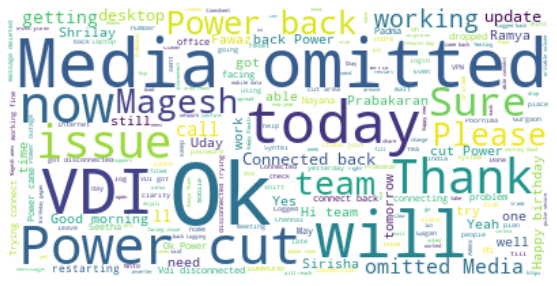

In [55]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Ramya @ Syntel


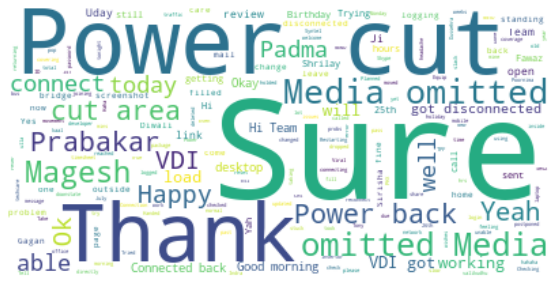

Author name Magesh@amex


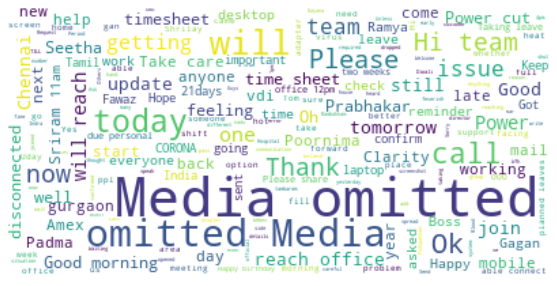

Author name Prabakaran


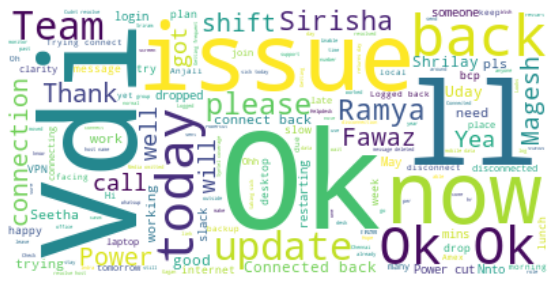

Author name Uday


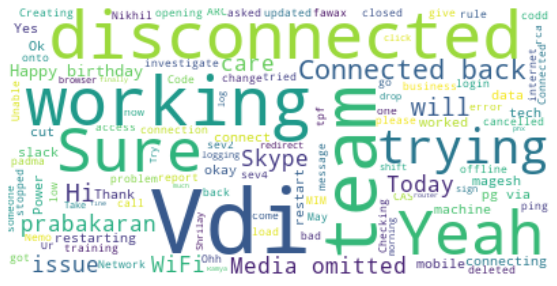

Author name Satya Anna@syntel


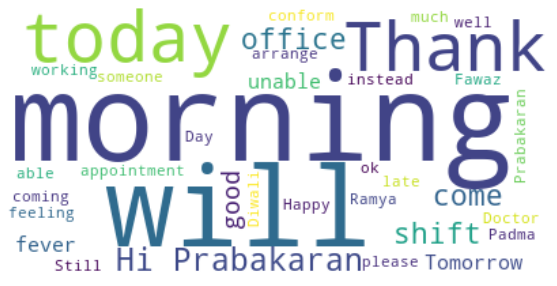

Author name K K Poornima


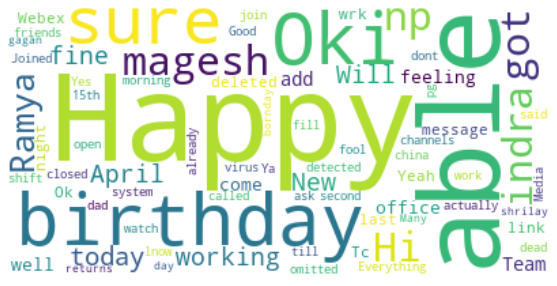

Author name Padma


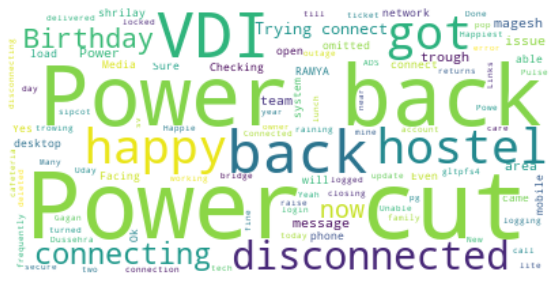

Author name Sireesha🍉🍉🍉


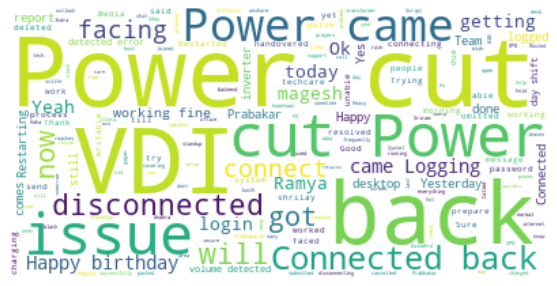

Author name Gagan


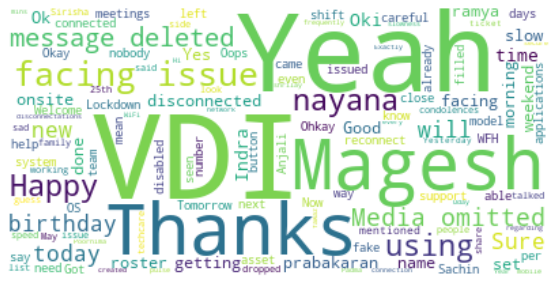

Author name Shrilay


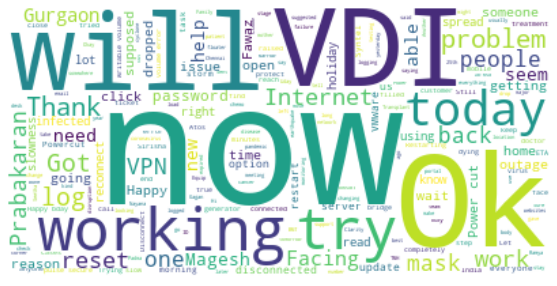

Author name Nayana


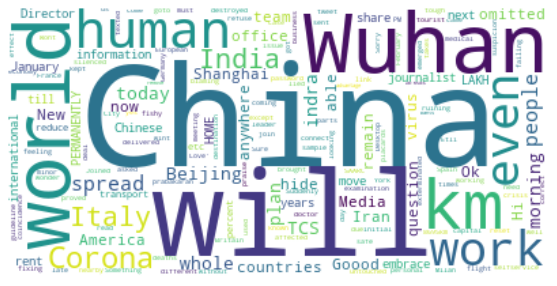

Author name +91 91766 67600


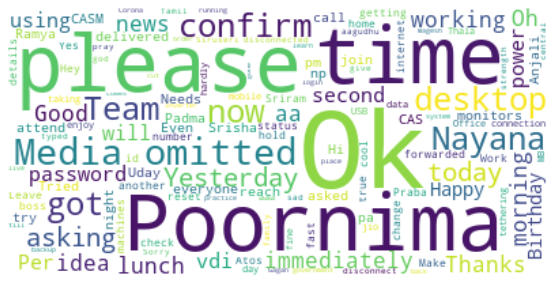

Author name Fawaz


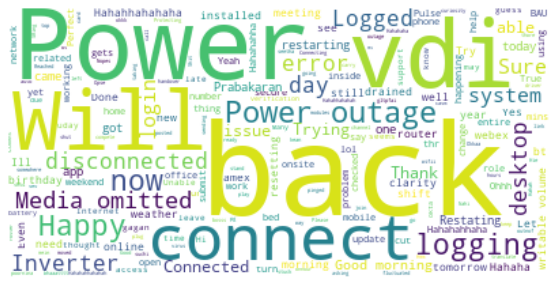

In [58]:
l = ['Ramya @ Syntel', 'Magesh@amex', 'Prabakaran', 'Uday',
       'Satya Anna@syntel', 'K K Poornima', 'Padma', 'Sireesha🍉🍉🍉',
       'Gagan', 'Shrilay', 'Nayana', '+91 91766 67600', 'Fawaz']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()